In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('datasets/Train.csv')
val = pd.read_csv('datasets/Val.csv')

In [3]:
train

,Comments,n_stars,len_cmt,Pin,Service,General,Others,SGeneral,SPin,SSer,SOth
0,Cho em hỏi sạc em dùng củ sạc chính hãng khi c...,3,88,1,0,0,1,0,0.0,0.0,0.0
1,Mình mua được khoảng 2 tháng và thấy cảm ứng n...,3,73,1,1,1,1,1,1.0,1.0,1.0
2,"sp thiết kế nhỏ gọn, mỏng , đẹp màu đen nhám s...",2,41,0,1,0,1,0,0.0,1.0,0.0
3,"Mới mua được 2 ngày\r\nDịch vụ tốt, tư vấn nhi...",4,91,1,1,1,1,1,1.0,1.0,1.0
4,"Mình vừa test máy mới, sao máy này game liên q...",4,82,0,0,1,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1275,Máy lỗi nghe nhạc bluetooth . Ra bảo hảnh thì ...,1,77,0,1,0,1,0,0.0,-1.0,-1.0
1276,Máy sài rất êm chụp hình rất đẹp không chê vào...,5,75,0,0,1,1,1,0.0,0.0,1.0
1277,"Điện thoại đẹp, pin dùng rất khỏe, camera tốt....",5,82,1,0,1,1,1,1.0,0.0,1.0
1278,Tựa là mới phát hiện cái loa bị rè ..ko biết l...,1,45,0,0,0,1,0,0.0,0.0,1.0


# Data Statistics

In [4]:
result = pd.DataFrame(columns=['Dataset', 'Reviews', 'Aspects', 'AvgLength', 'VocabSize'])

In [5]:
num_aspects_train = train[train['Pin'] == 1].shape[0] + train[train['Service'] == 1].shape[0] + train[train['General'] == 1].shape[0] + train[train['Others'] == 1].shape[0]
num_aspects_val = val[val['Pin'] == 1].shape[0] + val[val['Service'] == 1].shape[0] + val[val['General'] == 1].shape[0] + val[val['Others'] == 1].shape[0]

avg_length_train = train['len_cmt'].mean()
avg_length_val = val['len_cmt'].mean()

In [6]:
new_row_train = pd.DataFrame({
    'Dataset': ['Train'],
    'Reviews': [train.shape[0]],
    'Aspects': [num_aspects_train],
    'AvgLength': [avg_length_train],
    'VocabSize': [len(set(' '.join(train['Comments']).split()))]
})
result = pd.concat([result, new_row_train], ignore_index=True)

new_row_val = pd.DataFrame({
    'Dataset': ['Val'],
    'Reviews': [val.shape[0]],
    'Aspects': [num_aspects_val],
    'AvgLength': [avg_length_val],
    'VocabSize': [len(set(' '.join(val['Comments']).split()))]
})
result = pd.concat([result, new_row_val], ignore_index=True)

In [7]:
result

,Dataset,Reviews,Aspects,AvgLength,VocabSize
0,Train,1280,2363,81.592969,7095
1,Val,320,589,85.759375,3025


# Data Visualization

Text(0.5, 0, 'Avg Length of reviews')

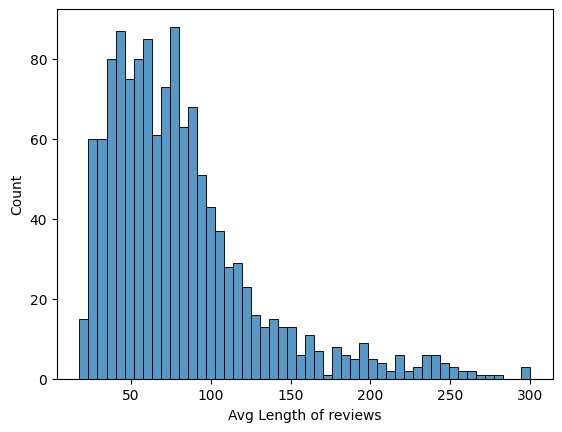

In [8]:
sns.histplot(x='len_cmt', data=train,bins=50)
plt.xlabel('Avg Length of reviews')

Text(0.5, 0, 'Avg Length of reviews')

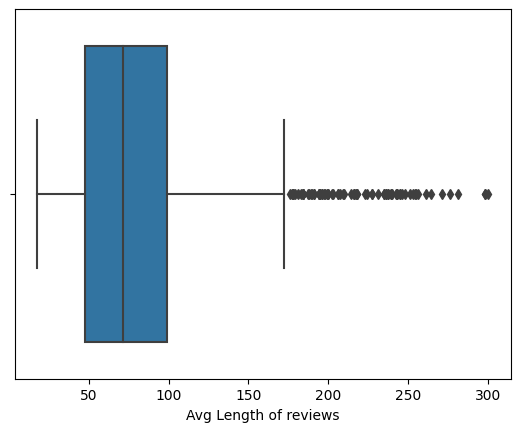

In [9]:
sns.boxplot(x='len_cmt', data=train)
plt.xlabel('Avg Length of reviews')

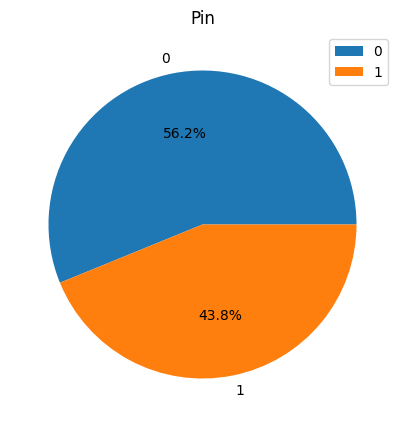

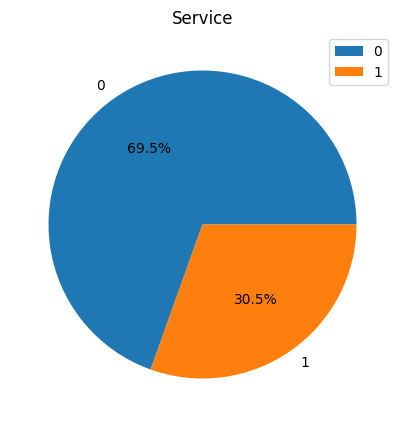

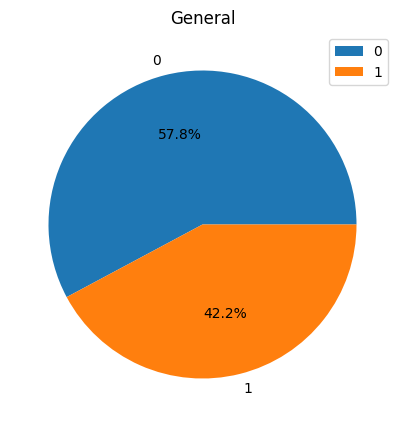

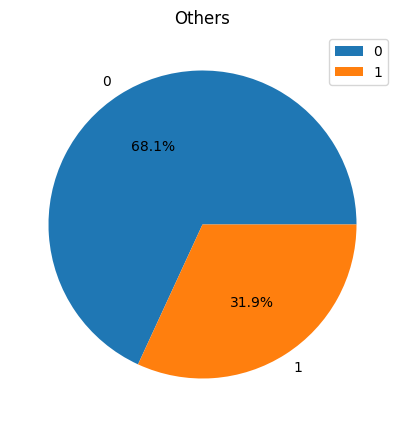

In [10]:
import matplotlib.pyplot as plt

# Biểu đồ cho cột 'Pin'
plt.figure(figsize=(5, 5))
plt.pie(train['Pin'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
plt.title('Pin')
plt.legend()
plt.show()

# Biểu đồ cho cột 'Service'
plt.figure(figsize=(5, 5))
plt.pie(train['Service'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
plt.title('Service')
plt.legend()
plt.show()

# Biểu đồ cho cột 'General'
plt.figure(figsize=(5, 5))
plt.pie(train['General'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
plt.title('General')
plt.legend()
plt.show()

# Biểu đồ cho cột 'Others'
plt.figure(figsize=(5, 5))
plt.pie(train['Others'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
plt.title('Others')
plt.legend()
plt.show()


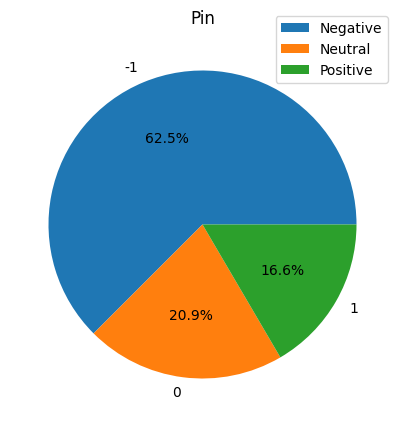

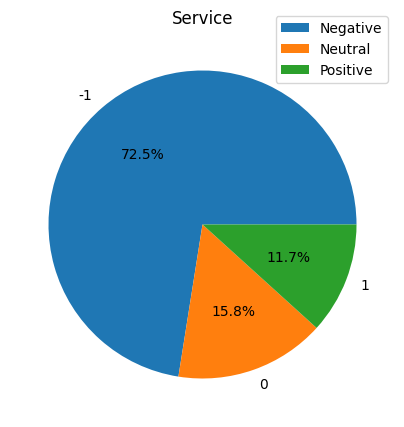

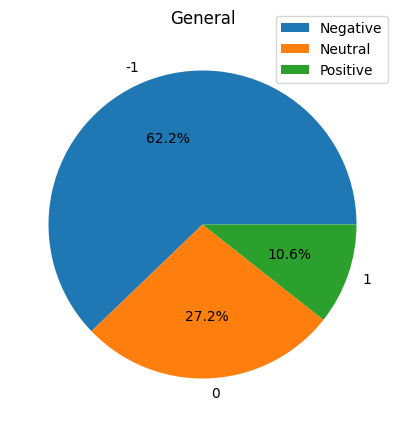

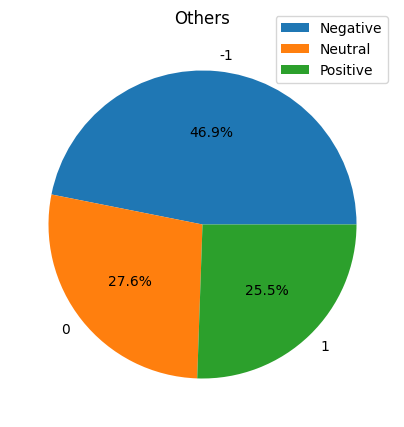

In [11]:
import matplotlib.pyplot as plt

# Biểu đồ cho cột 'SPin'
plt.figure(figsize=(5, 5))
labels = ['-1', '0', '1']
plt.pie(train['SPin'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Pin')
plt.legend(['Negative', 'Neutral', 'Positive'], bbox_to_anchor=(1, 1.06), loc="upper right")  # Thêm chú thích và điều chỉnh vị trí
plt.show()

# Biểu đồ cho cột 'SSer'
plt.figure(figsize=(5, 5))
plt.pie(train['SSer'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Service')
plt.legend(['Negative', 'Neutral', 'Positive'], bbox_to_anchor=(1, 1.06), loc="upper right")  # Thêm chú thích và điều chỉnh vị trí
plt.show()

# Biểu đồ cho cột 'SGeneral'
plt.figure(figsize=(5, 5))
plt.pie(train['SGeneral'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('General')
plt.legend(['Negative', 'Neutral', 'Positive'], bbox_to_anchor=(1, 1.06), loc="upper right")  # Thêm chú thích và điều chỉnh vị trí
plt.show()

# Biểu đồ cho cột 'SOth'
plt.figure(figsize=(5, 5))
plt.pie(train['SOth'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Others')
plt.legend(['Negative', 'Neutral', 'Positive'], bbox_to_anchor=(1, 1.06), loc="upper right")  # Thêm chú thích và điều chỉnh vị trí
plt.show()
